## **0. Introduction**

This notebook serves the purpose of exploring the data used in the master thesis. For now I will look into the dataset from [Kosti et al., 2017](https://openaccess.thecvf.com/content_cvpr_2017/papers/Kosti_Emotion_Recognition_in_CVPR_2017_paper.pdf), the data can be requested [here](https://docs.google.com/forms/d/e/1FAIpQLScXwxhEZu7RpHwgiRqVfb09GzHSSyIm64hJQMgHSLm75ltsFQ/viewform).

There are different types of image folders. At first I will investigate the "emodb_small" folder. This contains mostly images, in which the face is clearly visible.

In [1]:
import os
os.chdir('/mnt/c/Users/janos/OneDrive/Desktop/Master_thesis/kosti/emodb_small/images')

In [2]:
len(os.listdir())

861

The emod_small folder contains 861 images.

In [7]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

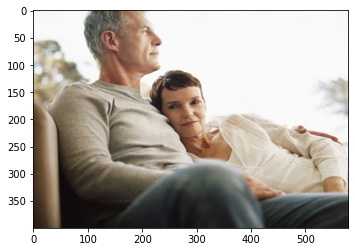

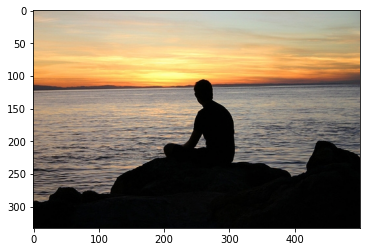

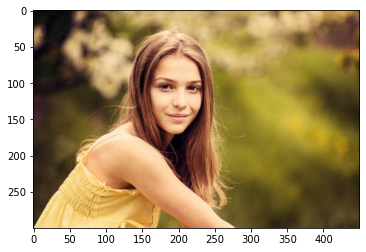

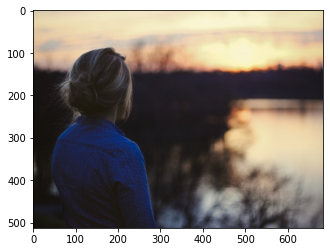

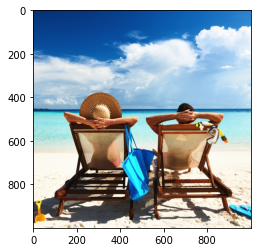

In [18]:
j=0
X = []
for img in os.listdir():
    image = mpimg.imread(img)
    plt.imshow(image)
    plt.show()
    j = j +1
    X.append(img)
    if j == 5:
        break
        
        

In [19]:
X

['007eear5kx5qhbzewz.jpg',
 '00qbvchuemlwx6muhk.jpg',
 '0185j147iy2lwsq0p9.jpg',
 '01qhe9raflmm17xf7k.jpg',
 '02hroo5r4kiukih6ig.jpg']

Lets try Alexnet for the object classification on the 5 images.
The following code cells are heavily inspired by this pytorch [tutorial](https://pytorch.org/hub/pytorch_vision_alexnet/).

In [ ]:
import torch

In [20]:
model = torch.hub.load('pytorch/vision:v0.10.0', 'alexnet', pretrained=True)
model.eval()

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /home/jpauli/.cache/torch/hub/v0.10.0.zip
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /home/jpauli/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100.0%


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

**Note:**

The annotations are stored in a *struct* within a *.mat* file. There exists a pytorch implementation, that stores .py file which transform the mat files into csv files. Please follow [this link](https://github.com/Tandon-A/emotic) to the respective github repository. After I assembled the images and annotations in the demanded structure, I ran the mat2py file and ended up with a training, validation and test csv file.

In [15]:
os.chdir('/mnt/c/Users/janos/OneDrive/Desktop/Master_thesis/kosti/mat2csv/emotic_pre/')

In [16]:
os.listdir()

['test.csv', 'train.csv', 'val.csv']

We will now inspect the 'train.csv' file.

In [17]:
import pandas as pd
train = pd.read_csv('train.csv')

In [29]:
print('The training data consists of {} images.'.format(train.shape[0]))

The training data consists of 23266 images.


In [26]:
train.head(n=10)

,Index,Folder,Filename,Image Size,BBox,Categorical_Labels,Continuous_Labels,Gender,Age
0,0,mscoco/images,COCO_val2014_000000562243.jpg,"[640, 640]","[86, 58, 564, 628]","['Disconnection', 'Doubt/Confusion']","[5, 3, 9]",Male,Adult
1,1,mscoco/images,COCO_train2014_000000288841.jpg,"[640, 480]","[485, 149, 605, 473]",['Anticipation'],"[6, 4, 7]",Male,Adult
2,2,mscoco/images,COCO_val2014_000000558171.jpg,"[640, 480]","[305, 92, 461, 465]","['Engagement', 'Excitement', 'Happiness']","[7, 8, 8]",Male,Teenager
3,3,mscoco/images,COCO_train2014_000000369575.jpg,"[480, 640]","[221, 63, 448, 372]","['Aversion', 'Pleasure']","[8, 9, 8]",Male,Kid
4,4,mscoco/images,COCO_train2014_000000213009.jpg,"[500, 333]","[44, 143, 150, 288]","['Confidence', 'Excitement']","[7, 9, 10]",Male,Adult
5,5,mscoco/images,COCO_train2014_000000462955.jpg,"[640, 478]","[42, 32, 413, 472]","['Anticipation', 'Engagement', 'Peace']","[3, 6, 8]",Male,Adult
6,6,mscoco/images,COCO_val2014_000000168683.jpg,"[500, 375]","[257, 39, 405, 183]","['Anticipation', 'Engagement']","[6, 7, 7]",Male,Adult
7,7,mscoco/images,COCO_train2014_000000186198.jpg,"[640, 429]","[336, 80, 494, 327]","['Anticipation', 'Peace']","[7, 7, 8]",Male,Kid
8,8,mscoco/images,COCO_train2014_000000006590.jpg,"[640, 480]","[188, 109, 381, 382]",['Engagement'],"[7, 4, 7]",Female,Kid
9,9,mscoco/images,COCO_train2014_000000144608.jpg,"[350, 500]","[198, 29, 300, 232]","['Fatigue', 'Happiness']","[7, 7, 6]",Male,Teenager


We see that the training set not only contains the continous and categorial labels, but the respective image. Since we may want to take adavantage of the different image type for each "folder", we could extract the respective folder with the labels. Meaning we have 4 csv files for each folder type. 

In [24]:
train['Folder'].unique()

array(['mscoco/images', 'emodb_small/images', 'framesdb/images',
       'ade20k/images'], dtype=object)